# Diabetes Analysis & Prediction

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Unique Value Analysis
* Categorical & Numerical Feature Analysis
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling & Tuning Machine Learning Model

## Introduction
* Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. 
* Blood glucose is your main source of energy and comes from the food you eat. 
* Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.
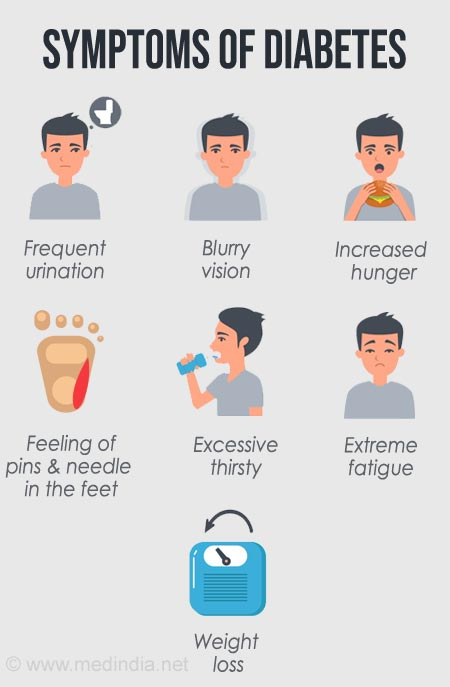

<a id='0'></a>
## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read & Analyze Data](#3)
4. [Fill Missing Values With NaN](#4)
5. [Basic Info About Dataset](#5)
6. [Data Visualization](#6)
7. [Missing Value Analysis](#7)
8. [Unique Value Analysis](#8)
9. [Standardization](#9)
10. [Box Plot Analysis](#10)
11. [Swarm Plot Analysis](#11)
12. [Cat Plot Analysis](#12)
13. [Correlation Analysis](#13)
14. [Outlier Detection](#14)
15. [Modelling --> Scaling (For Numerical Features)](#15)
16. [Modelling --> Train / Test Split](#16)
17. [Modelling --> Logistic Regression](#17)
18. [Modelling --> Logistic Regression --> Hyperparameter Tuning](#18)

<a id='1'></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

--> [Turn Back To Analysis Content](#0)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# EDA
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Classification Algorithm
from sklearn.linear_model import LogisticRegression

# Standardization
from sklearn.preprocessing import StandardScaler

# Train Test Splitting and Tuning With Grid Search Cross Validation
from sklearn.model_selection import train_test_split, GridSearchCV

# Accuracy Score & ROC Curve
from sklearn.metrics import accuracy_score, roc_curve

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/diabetes-data-set/diabetes.csv


<a id='2'></a>
## Data Content
* Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

--> [Turn Back To Analysis Content](#0)

<a id='3'></a>
## Read Data
* In this section, we read diabetes.csv dataset.

--> [Turn Back To Analysis Content](#0)

In [2]:
# read data
diabetes = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
df = diabetes.copy()
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<a id='4'></a>
## Fill Missing Values With NaN

--> [Turn Back To Analysis Content](#0)

In [3]:
# eksik veriler 0 olarak verilmiş o sebeple 0 olmaması gereken yerleri NaN ile dolduracağız
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

<a id='5'></a>
## Basic Info About Dataset

--> [Turn Back To Analysis Content](#0)

In [4]:
# describe the basics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<a id='6'></a>
## Data Visualization

--> [Turn Back To Analysis Content](#0)

Text(0.5, 1.0, 'Count of Outcome Values')

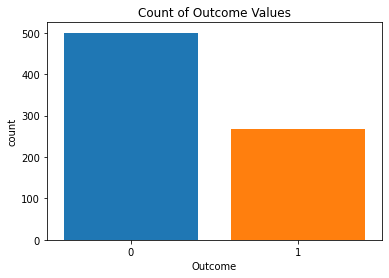

In [6]:
# countplot
plt.figure()
sns.countplot(x = df["Outcome"], data = df, saturation = 1)
plt.title("Count of Outcome Values")

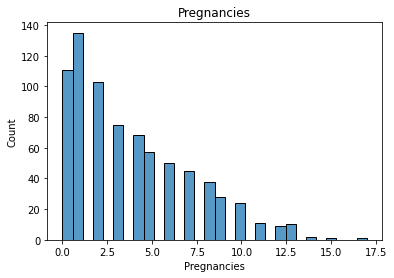

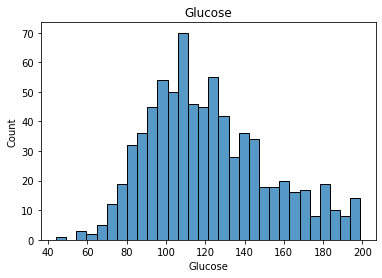

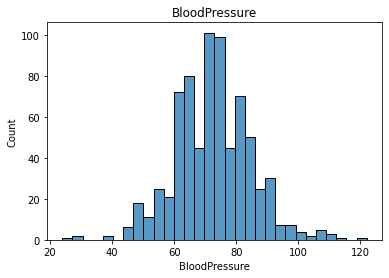

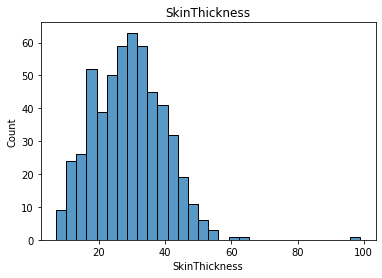

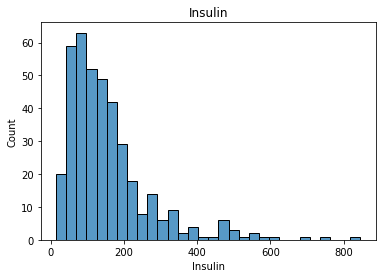

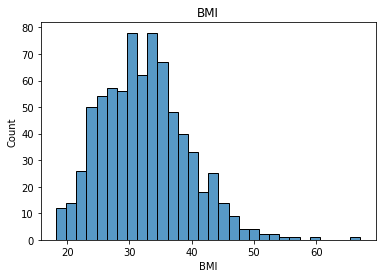

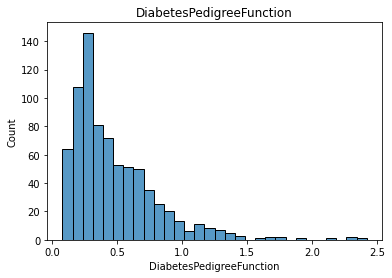

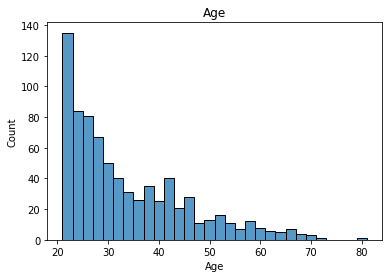

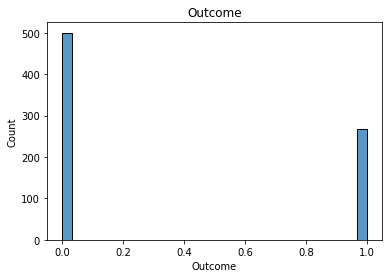

In [7]:
# Histogram
for i in list(df.columns):
    plt.figure()
    sns.histplot(x = i, data = df, bins = 30)
    plt.title(i)

<Figure size 432x288 with 0 Axes>

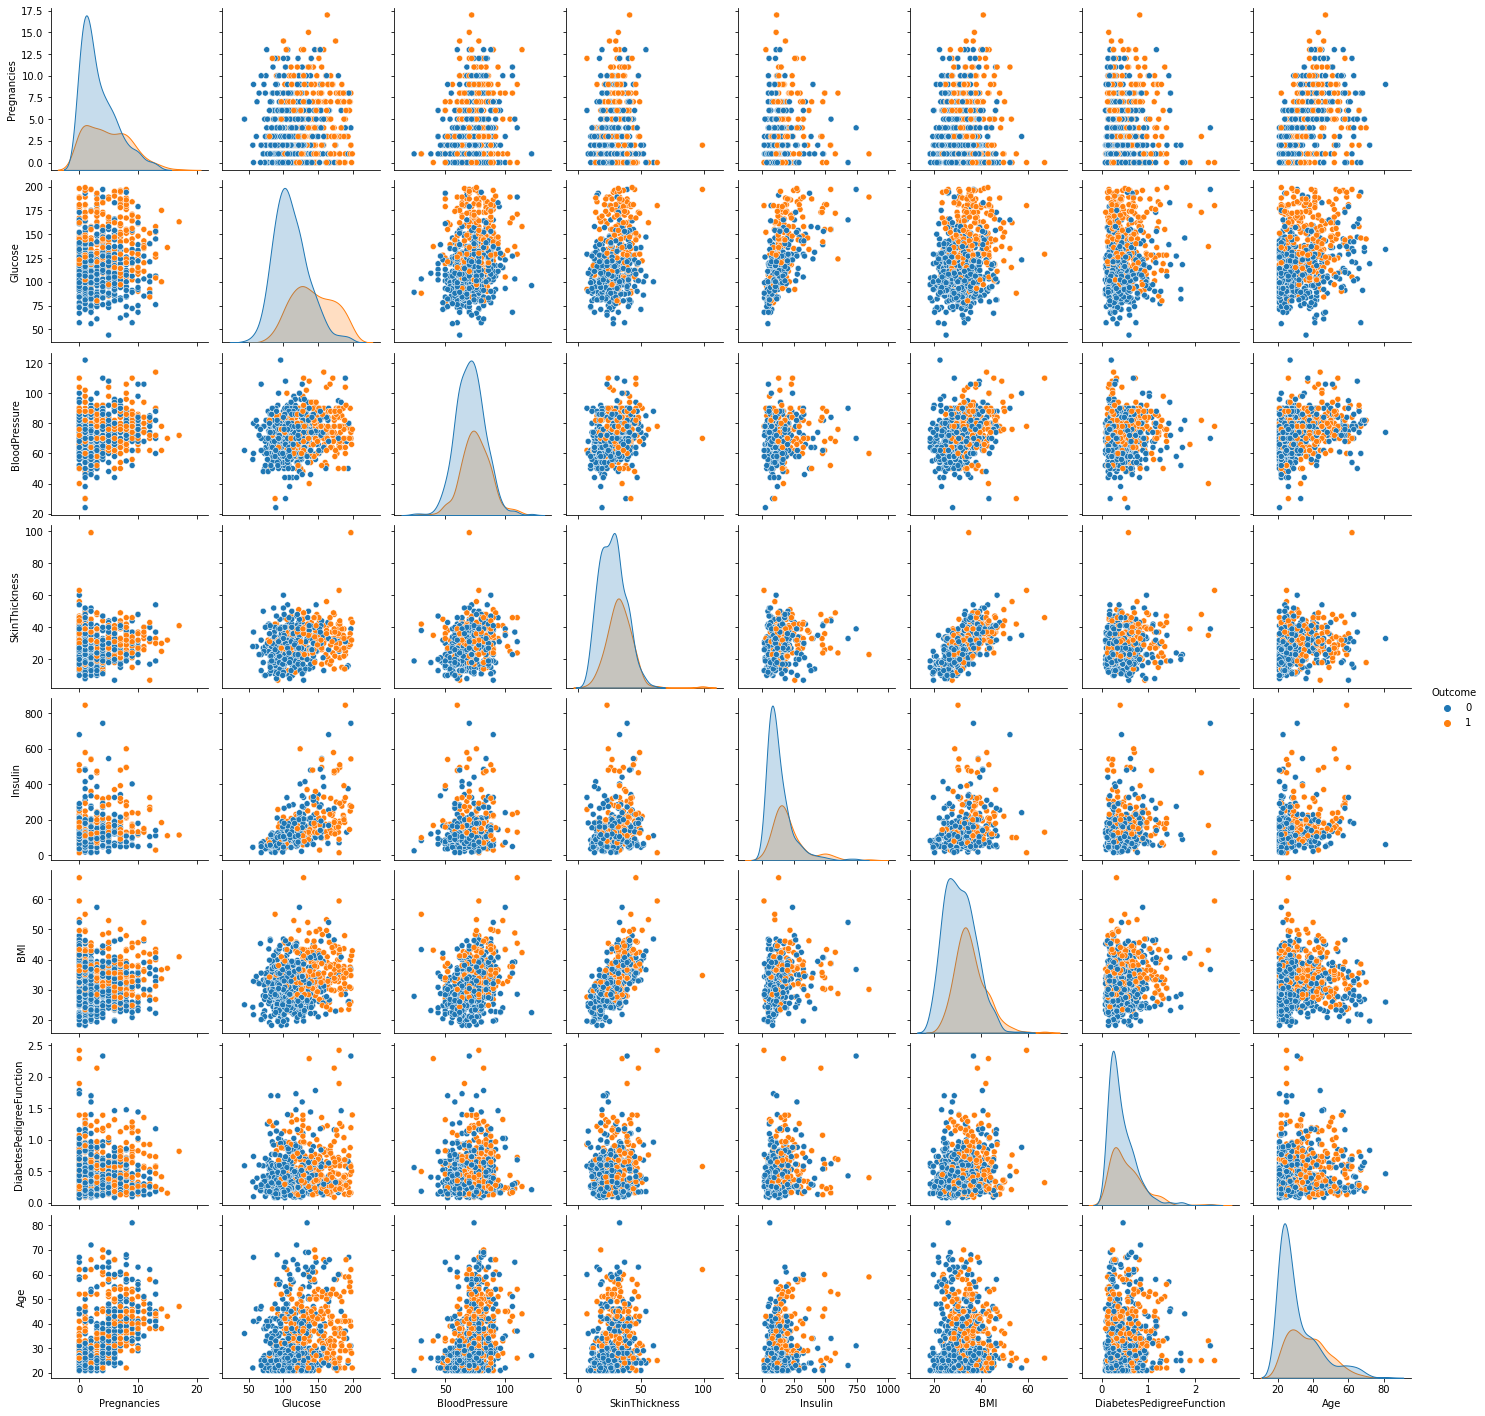

In [8]:
# Pairplot
plt.figure()
sns.pairplot(df, hue = "Outcome", diag_kind = "kde")
plt.show()

<a id='7'></a>
## Missing Value Analysis

--> [Turn Back To Analysis Content](#0)

In [9]:
# Insulin ve SkinThickness featurelerında çok fazla eksik veri var
# Eksik veri olan satırları veri setinden atarsak muhtemelen verilerin yarısını kaybederiz
# İki önemli feature'ı direkt olarak verisetinden atmamız da mantıklı olmayacaktır.

In [10]:
# O sebeple tüm eksik verileri bulundukları sütunların medyan değeri ile dolduracağız
for i in list(df.columns):
    df[i] = df[i].fillna(df[i].median())

In [11]:
# eksik veriler gitmiş mi diye kontrol edelim
for i in list(df.columns):
    print(f"{i} --> {df[i].isnull().sum()}")

Pregnancies --> 0
Glucose --> 0
BloodPressure --> 0
SkinThickness --> 0
Insulin --> 0
BMI --> 0
DiabetesPedigreeFunction --> 0
Age --> 0
Outcome --> 0


In [12]:
# describe bilgisine tekrar bakalım
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<a id='8'></a>
## Unique Value Analysis

--> [Turn Back To Analysis Content](#0)

In [13]:
# unique values
for i in list(df.columns):
    print(f"{i} --> {df[i].value_counts().shape[0]}")

Pregnancies --> 17
Glucose --> 135
BloodPressure --> 46
SkinThickness --> 50
Insulin --> 185
BMI --> 247
DiabetesPedigreeFunction --> 517
Age --> 52
Outcome --> 2


<a id='9'></a>
## Standardization

--> [Turn Back To Analysis Content](#0)

In [14]:
scaler = StandardScaler()
scaler

StandardScaler()

In [15]:
numerical_list = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

In [16]:
scaled_array = scaler.fit_transform(df[numerical_list])
scaled_array

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [17]:
# sayısal veriler 0 ortalamalı ve 1 standart sapmalı hale çevrildi yani standardize edildi
pd.DataFrame(scaled_array).describe().T

,count,mean,std,min,25%,50%,75%,max
0,768.0,-6.476301e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
1,768.0,4.625929e-18,1.000652,-2.552931,-0.720163,-0.153073,0.611265,2.542658
2,768.0,5.782412e-18,1.000652,-4.002619,-0.693761,-0.031990,0.629782,4.104082
3,768.0,-1.526557e-16,1.000652,-2.516429,-0.467597,-0.012301,0.329171,7.955377
4,768.0,1.503427e-17,1.000652,-1.467353,-0.222085,-0.181541,-0.155477,8.170442
5,768.0,2.613650e-16,1.000652,-2.074783,-0.721209,-0.022590,0.603256,5.042397
6,768.0,2.451743e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
7,768.0,1.931325e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716


<a id='10'></a>
## Box Plot Analysis

--> [Turn Back To Analysis Content](#0)

In [18]:
df_dummy = pd.DataFrame(scaled_array, columns = numerical_list)
df_dummy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [19]:
df_dummy = pd.concat([df_dummy, df.loc[:, "Outcome"]], axis = 1)
df_dummy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


In [20]:
df_melted = pd.melt(df_dummy, id_vars = "Outcome", var_name = "features", value_name = "value")
df_melted.head(10)

,Outcome,features,value
0,1,Pregnancies,0.639947
1,0,Pregnancies,-0.844885
2,1,Pregnancies,1.233880
3,0,Pregnancies,-0.844885
4,1,Pregnancies,-1.141852
5,0,Pregnancies,0.342981
6,1,Pregnancies,-0.250952
7,0,Pregnancies,1.827813
8,1,Pregnancies,-0.547919
9,1,Pregnancies,1.233880


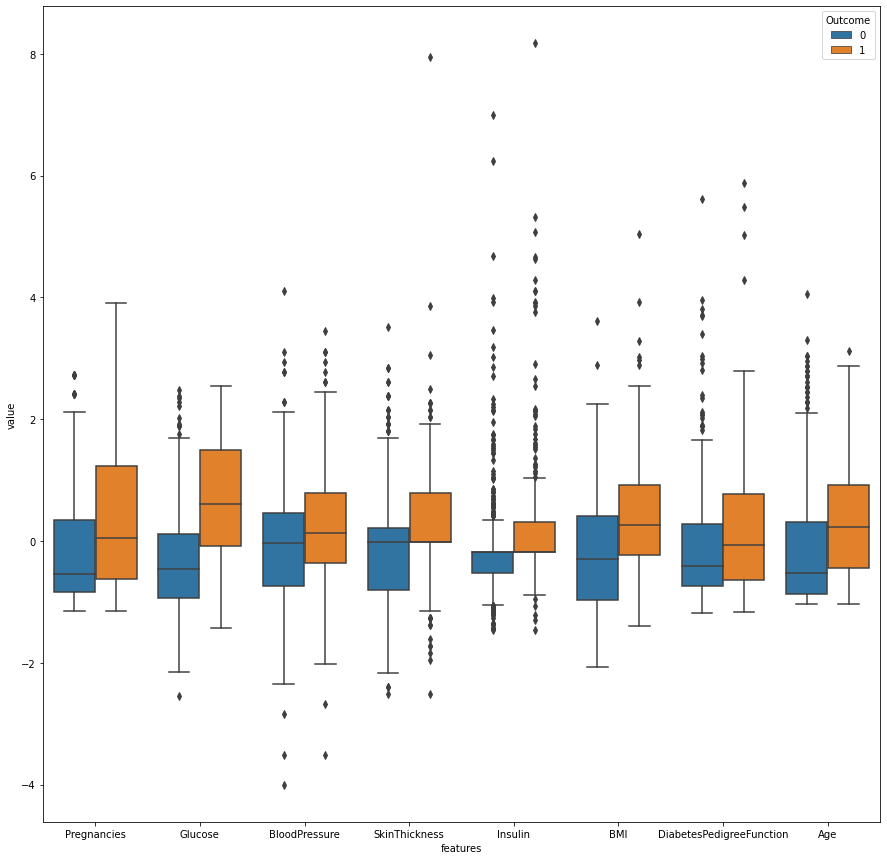

In [21]:
# box plot
plt.figure(figsize = (15, 15))
sns.boxplot(x = "features", y = "value", hue = "Outcome", data = df_melted)
plt.show()

In [22]:
# Insulin ve Skinthickness değişkenlerinde çok ciddi aykırı gözlemler var daha sonra ele alacağız

<a id='11'></a>
## Swarm Plot Analysis

--> [Turn Back To Analysis Content](#0)

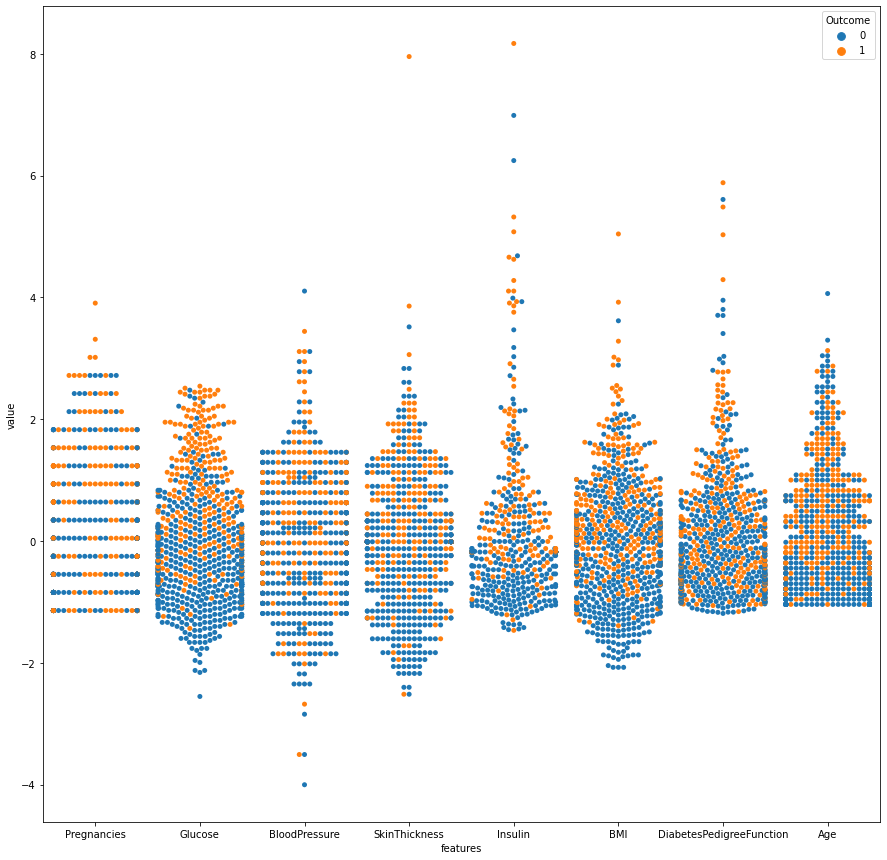

In [23]:
# box plot
plt.figure(figsize = (15, 15))
sns.swarmplot(x = "features", y = "value", hue = "Outcome", data = df_melted)
plt.show()

<a id='12'></a>
## Cat Plot Analysis

--> [Turn Back To Analysis Content](#0)

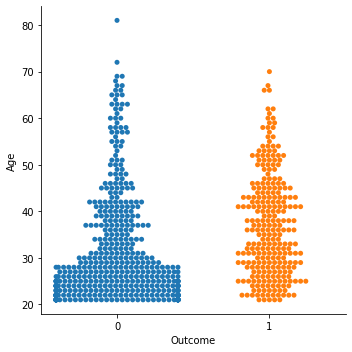

In [24]:
# cat plot
sns.catplot(x = "Outcome", y = "Age", hue = "Outcome", kind = "swarm", data = df)
plt.show()

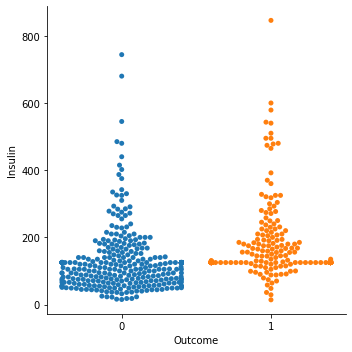

In [25]:
sns.catplot(x = "Outcome", y = "Insulin", hue = "Outcome", kind = "swarm", data = df)
plt.show()

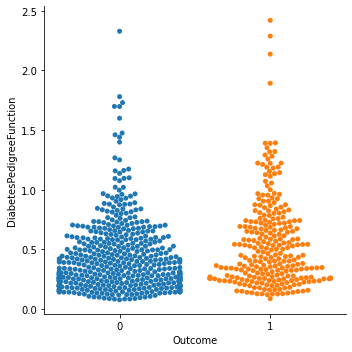

In [26]:
sns.catplot(x = "Outcome", y = "DiabetesPedigreeFunction", hue = "Outcome", kind = "swarm", data = df)
plt.show()

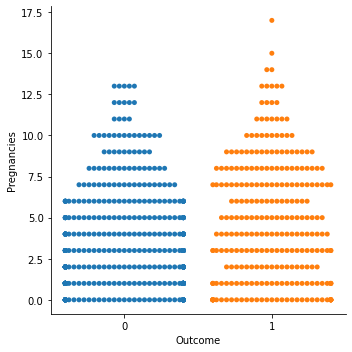

In [27]:
sns.catplot(x = "Outcome", y = "Pregnancies", hue = "Outcome", kind = "swarm", data = df)
plt.show()

<a id='13'></a>
## Correlation Analysis

--> [Turn Back To Analysis Content](#0)

In [28]:
# correlation dataframe
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


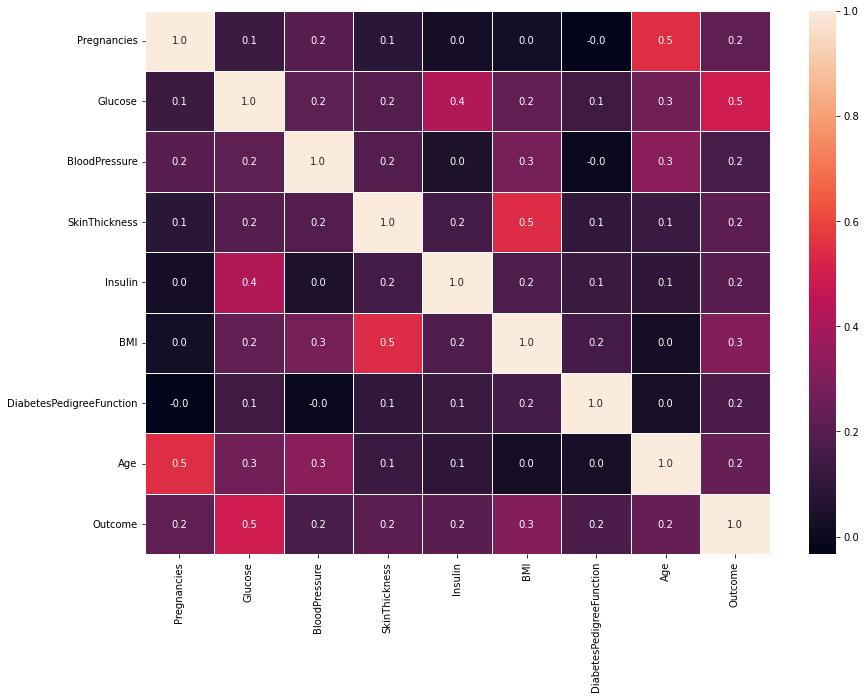

In [29]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [30]:
# ilişkili olanlar:
# Pregnancies - Age, Glucose - Insulin, SkinThickness - BMI, Glucose- Outcome

<a id='14'></a>
## Outlier Detection

--> [Turn Back To Analysis Content](#0)

In [31]:
numerical_list = list(df.columns[:-1])
df_numerical = df.loc[:, numerical_list]
df_numerical.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [33]:
for i in numerical_list:
    # calculate IQR value
    Q1 = np.percentile(df.loc[:, i], 25)     # lower quartille
    Q3 = np.percentile(df.loc[:, i], 75)     # upper quartille
    IQR = Q3 - Q1
    
    # printing old shape... shape is going to change after drop outliers from dataframe
    print(f"Old shape: {df.loc[:, i].shape}")
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 + (IQR * 2.5)))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - (IQR * 2.5)))
    
    print(f"{i} --> {lower} - {upper}")
    
    # drop upper outliers
    try:
        df.drop(upper[0], inplace = True)
    except:
        print(f"KeyError: {upper[0]} not found in axis")
        
    # drop lower outliers
    try:
        df.drop(lower[0], inplace = True)
    except:
        print(f"KeyError: {lower[0]} not found in axis")
        
    # printing new shape
    print(f"New shape: {df.shape}")

Old shape: (768,)
Pregnancies --> (array([], dtype=int64),) - (array([], dtype=int64),)
New shape: (768, 9)
Old shape: (768,)
Glucose --> (array([], dtype=int64),) - (array([], dtype=int64),)
New shape: (768, 9)
Old shape: (768,)
BloodPressure --> (array([597]),) - (array([106]),)
New shape: (766, 9)
Old shape: (766,)
SkinThickness --> (array([253, 518]),) - (array([ 57,  86,  99, 119, 149, 210, 272, 274, 444, 531, 578, 590]),)
New shape: (752, 9)
Old shape: (752,)
Insulin --> (array([  3,   6,  18,  32,  40,  50,  51,  52,  67,  69,  81,  85,  90,
        92,  95,  96, 100, 104, 105, 108, 122, 129, 131, 132, 137, 150,
       152, 163, 167, 168, 175, 176, 181, 185, 191, 197, 202, 217, 218,
       222, 225, 227, 234, 245, 257, 263, 264, 265, 278, 279, 280, 281,
       292, 303, 305, 306, 313, 319, 321, 324, 331, 336, 338, 343, 348,
       355, 358, 361, 362, 363, 366, 367, 369, 370, 373, 375, 379, 383,
       392, 403, 411, 412, 421, 422, 431, 434, 435, 436, 437, 438, 439,
       446, 4

<a id='15'></a>
## Modelling --> Scaling (For Numerical Features)

--> [Turn Back To Analysis Content](#0)

In [34]:
# copy original df 
df1 = df.copy()

In [35]:
# splitting features and output
X = df1.drop(["Outcome"], axis = 1)
y = df1[["Outcome"]]

In [36]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [37]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [38]:
scaler = StandardScaler()
scaler

StandardScaler()

In [39]:
X[numerical_list] = scaler.fit_transform(X[numerical_list])

In [40]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.654948,0.848347,-0.032159,0.683405,-0.185587,0.170146,0.464303,1.417127
1,-0.849987,-1.214350,-0.536390,-0.012055,-0.185587,-0.856125,-0.367702,-0.191705
2,1.256922,1.994290,-0.704467,-0.012055,-0.185587,-1.339938,0.599957,-0.107030
3,-0.849987,-1.083385,-0.536390,-0.707514,-0.541455,-0.636209,-0.922373,-1.038459
4,-1.150974,0.488193,-2.721390,0.683405,0.308036,1.562941,5.471410,-0.022354


In [41]:
# standardized numerical features

<a id='16'></a>
## Modelling --> Train / Test Split

--> [Turn Back To Analysis Content](#0)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (525, 8)
X_test shape: (225, 8)
y_train shape: (525, 1)
y_test shape: (225, 1)


<a id='17'></a>
## Modelling --> Logistic Regression

--> [Turn Back To Analysis Content](#0)

In [43]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [44]:
# fitting = training section
logreg.fit(X_train, y_train)

LogisticRegression()

In [45]:
# calculate probabilistic prediction
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.91742509, 0.08257491],
       [0.87533523, 0.12466477],
       [0.78741763, 0.21258237],
       [0.8727354 , 0.1272646 ],
       [0.04656921, 0.95343079],
       [0.56253318, 0.43746682],
       [0.68977204, 0.31022796],
       [0.97144872, 0.02855128],
       [0.35887343, 0.64112657],
       [0.77014871, 0.22985129],
       [0.97324428, 0.02675572],
       [0.11227323, 0.88772677],
       [0.89840487, 0.10159513],
       [0.64627622, 0.35372378],
       [0.65697897, 0.34302103],
       [0.64670036, 0.35329964],
       [0.12486683, 0.87513317],
       [0.84834264, 0.15165736],
       [0.22502352, 0.77497648],
       [0.03806875, 0.96193125],
       [0.89762835, 0.10237165],
       [0.92106301, 0.07893699],
       [0.41978082, 0.58021918],
       [0.66951931, 0.33048069],
       [0.70265216, 0.29734784],
       [0.70150837, 0.29849163],
       [0.88747934, 0.11252066],
       [0.72435888, 0.27564112],
       [0.15381759, 0.84618241],
       [0.50032473, 0.49967527],
       [0.

In [46]:
# logistic regression probabilistic özelliğinden olayı çıkan sonuçların kendi aralarında toplamı 1

In [47]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [48]:
# Test Accuracy 
print(f"Test Accuracy Score: {accuracy_score(y_pred, y_test)}")

Test Accuracy Score: 0.7733333333333333


In [49]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

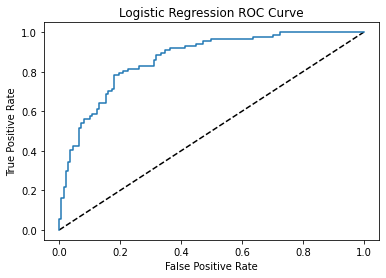

In [50]:
# plot curve
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [51]:
# %77 accuracy score'u Hyperparameter tuning ile yükseltmeye çalışacağız

<a id='18'></a>
## Modelling --> Logistic Regression --> Hyperparameter Tuning

--> [Turn Back To Analysis Content](#0)

In [52]:
lr = LogisticRegression()
lr

LogisticRegression()

In [53]:
penalty = ["l1", "l2"]
parameters = {"penalty":penalty}

In [54]:
lr_searcher = GridSearchCV(lr, parameters)

In [55]:
lr_searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [56]:
print(f"Best Parameters: {lr_searcher.best_params_}")

Best Parameters: {'penalty': 'l2'}


In [57]:
y_pred = lr_searcher.predict(X_test)

In [58]:
print(f"Test Accuracy: {accuracy_score(y_pred, y_test)}")

Test Accuracy: 0.7733333333333333


In [59]:
# tune etmemize rağmen başarı oranı yine de yükselmedi
# %77.3 oraında başarı elde ettik